In [2]:
import pandas as pd
import numpy as np

In [33]:
df = pd.read_csv("Tweets.csv")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

(array([3099.,    0.,    0.,    0.,    0., 2363.,    0.,    0.,    0.,
        9178.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

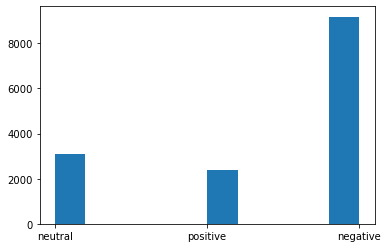

In [9]:
import matplotlib.pyplot as plt
plt.hist(y)

# Spliting on train, test

In [10]:
from sklearn.model_selection import train_test_split

# Preprocessing

In [1]:
import text_normalizer as tn

2021-05-19 17:00:59 INFO: Downloading default packages for language: en (English)...
2021-05-19 17:01:00 INFO: File exists: C:\Users\user\stanza_resources\en\default.zip.
2021-05-19 17:01:04 INFO: Finished downloading models and saved to C:\Users\user\stanza_resources.
2021-05-19 17:01:04 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| sentiment | sstplus   |
| ner       | ontonotes |

2021-05-19 17:01:04 INFO: Use device: cpu
2021-05-19 17:01:04 INFO: Loading: tokenize
2021-05-19 17:01:04 INFO: Loading: pos
2021-05-19 17:01:05 INFO: Loading: lemma
2021-05-19 17:01:05 INFO: Loading: depparse
2021-05-19 17:01:06 INFO: Loading: sentiment
2021-05-19 17:01:07 INFO: Loading: ner
2021-05-19 17:01:07 INFO: Done loading processors!
2021-05-19 17:01:07 INFO: Loading these models for language: en (English):
| Processor | Package   |


In [20]:
cleaned_text = tn.normalize_corpus(df['text'], contraction_expansion=True, accented_char_removal=True,
                     special_char_removal=True, remove_digits=True,
                     repeated_characters_remover=True, text_lower_case=True,
                     stop_words_remover = True, text_lemmatization=False, mentioning_remover = True, stopword_removal =True)

In [35]:
df['CleanTweet'] = cleaned_text
df = df.replace(r'^(\s?)+$', np.nan, regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [38]:
df = df.dropna(subset=['CleanTweet']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14613 entries, 0 to 14612
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14613 non-null  int64  
 1   airline_sentiment             14613 non-null  object 
 2   airline_sentiment_confidence  14613 non-null  float64
 3   negativereason                9170 non-null   object 
 4   negativereason_confidence     10510 non-null  float64
 5   airline                       14613 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14613 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14613 non-null  int64  
 10  text                          14613 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14613 non-null  object 
 13  t

In [59]:
X_clean = df['CleanTweet'].to_numpy()
y =  df['airline_sentiment'].to_numpy()

X_clean = np.reshape(X_clean, (X_clean.shape[0],1))
print(X_clean.shape,y.shape)

(14613, 1) (14613,)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9790, 1) (4823, 1) (9790,) (4823,)


In [61]:
X_train

array([['spoke rep phone suggested voice concern via ehemail us site moments ago'],
       ['flt last nght cancelled flightedmech probs flt cancelled flightedsnow finally flt home st cls ehempty amp not let sit'],
       ['still not air deicing plane miss connect customer service helpful hoping catch next flight'],
       ...,
       ['award travel ticket cannot since different last name simply need change'],
       ['power trip felt completely threatened unsafe angry derrick bussey dca would like reiterate'],
       ['service rep not happened yet honestly fed sick no notice flight got cancelled flighted']],
      dtype=object)

In [62]:
y

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

In [48]:
import tokenizer
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [51]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['CleanTweet'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 11890 unique tokens.


In [57]:
import tensorflow as tf

In [58]:
X = tokenizer.texts_to_sequences(df['CleanTweet'].values)
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (14613, 250)


In [63]:
Y = pd.get_dummies(df['airline_sentiment']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (14613, 3)


In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(13151, 250) (13151, 3)
(1462, 250) (1462, 3)


In [72]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

In [74]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Train on 11835 samples, validate on 1316 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
11835/11835 [==============================] - 99s 8ms/sample - loss: 0.7281 - acc: 0.7012 - val_loss: 0.6073 - val_acc: 0.7561
Epoch 2/5
11835/11835 [==============================] - 100s 8ms/sample - loss: 0.4455 - acc: 0.8253 - val_loss: 0.5541 - val_acc: 0.7789
Epoch 3/5
11835/11835 [==============================] - 99s 8ms/sample - loss: 0.3248 - acc: 0.8800 - val_loss: 0.5959 - val_acc: 0.7804
Epoch 4/5
11835/11835 [==============================] - 100s 8ms/sample - loss: 0.2502 - acc: 0.9096 - val_loss: 0.6476 - val_acc: 0.7781
Epoch 5/5
11835/11835 [==============================] - 100s 8ms/sample - loss: 0.1963 - acc: 0.9294 - val_loss: 0.7366 - val_acc: 0.7705


In [75]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1462/1462 [==============================] - 2s 1ms/sample - loss: 0.7397 - acc: 0.7654
Test set
  Loss: 0.740
  Accuracy: 0.765


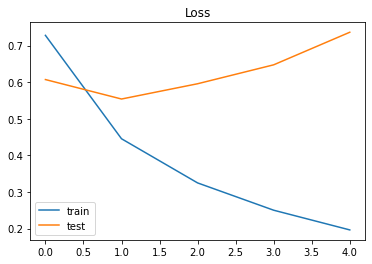

In [76]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

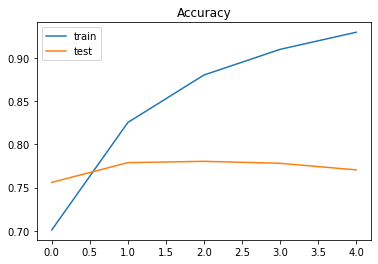

In [77]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

In [86]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(3, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_5 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         98816     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 387       
Total params: 2,758,019
Trainable params: 2,758,019
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, batch_size=32, epochs=2, validation_data=(X_test, Y_test))

Train on 13151 samples, validate on 1462 samples
Epoch 1/2
13151/13151 [==============================] - 347s 26ms/sample - loss: 0.1736 - acc: 0.9356 - val_loss: 0.3915 - val_acc: 0.8500
Epoch 2/2
13151/13151 [==============================] - 358s 27ms/sample - loss: 0.1295 - acc: 0.9530 - val_loss: 0.4262 - val_acc: 0.8493


Train on 11835 samples, validate on 1316 samples
Epoch 1/2
11835/11835 [==============================] - 320s 27ms/sample - loss: 0.0945 - acc: 0.9672 - val_loss: 0.1198 - val_acc: 0.9567
Epoch 2/2
11835/11835 [==============================] - 315s 27ms/sample - loss: 0.0726 - acc: 0.9756 - val_loss: 0.1501 - val_acc: 0.9493


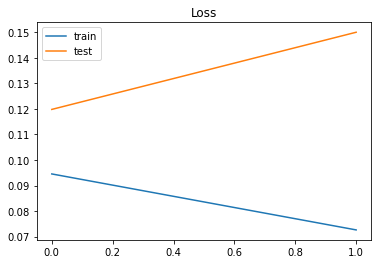

In [94]:
history2 = model.fit(X_train, Y_train, epochs=2, batch_size=32,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
plt.title('Loss')
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()

In [95]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1462/1462 [==============================] - 4s 3ms/sample - loss: 0.5401 - acc: 0.8415
Test set
  Loss: 0.540
  Accuracy: 0.842


In [84]:
print(X_train.shape, Y_train.shape)

(13151, 250) (13151, 3)


In [ ]:
CV

In [ ]:
Confusion matrix

In [10]:
normalized_corpus={}
for i,doc in enumerate(df['text']):
    doc = tn.remove_stopwords(doc, is_lower_case=True)
    print(i,doc)


0 @VirginAmerica What @dhepburn said .
1 @VirginAmerica plus ' added commercials experience ... tacky .
2 @VirginAmerica I ' today ... Must mean I need take another trip !
3 @VirginAmerica ' really aggressive blast obnoxious " entertainment " guests ' faces &amp ; little recourse
4 @VirginAmerica ' really big bad thing
5 @VirginAmerica seriously would pay $ 30 flight seats ' playing. ' really bad thing flying VA
6 @VirginAmerica yes , nearly every time I fly VX “ear worm ” ’ go away : )
7 @VirginAmerica Really missed prime opportunity Men Without Hats parody , there. https://t.co/mWpG7grEZP
8 @virginamerica Well , I ' … NOW I DO ! : -D
9 @VirginAmerica amazing , arrived hour early. You ' good .
10 @VirginAmerica know suicide second leading cause death among teens 10-24
11 @VirginAmerica I &lt ; 3 pretty graphics. much better minimal iconography. : D
12 @VirginAmerica This great deal ! Already thinking 2nd trip @Australia &amp ; I ' even gone 1st trip yet ! ; p
13 @VirginAmerica @virgin

783 @united seriously #fail making strangers share room
784 @united @luke_mcintosh68 nah '
785 @united needed asap. Will make today ' flight ?
786 @united agent split reservation ? Now ' Cancelled Flight refund credit 2wks ? Why
787 @united Our vacation ' going ruined w/ 3 days rain. : ( The change fee 2 us nearly cost original flight. Can help ?
788 @united I sent message. Let know ASAP .
789 @united would make share room ?
790 @united tried calling , w/25 min phn wait means ' miss options anyway
791 @united ask guys flight 1146 BWI wait us get delayed flight San Diego ? Pretty please ?
792 @united ' still waiting find rep working hard - upset wait tomorrow pm get mammoth
793 @united early flt , I think call appropriate. Yes , reviewed nada avail next day. Expect full refund
794 @united understand , thanks
795 @united I ask , I call get fixed ? Tweeting BS questions stall makes things worse. Phone number please .
796 @united Yo yo yo stuck tarmac 2 hours @fly2ohare ... Going miss ride

1502 @united wanted point not one United crew sympathetic. Questions unanswered. MileagePlus starting look like joke
1503 @united get explanation UA978 São Paulo Houston delayed ? Now ' hearing crew Cancelled Flightlations .
1504 @united Why flight 1180 EWR MCO Cancelled Flightled tomorrow I rebook. Asking relative .
1505 @united Can tell Jet Airways award availability ?
1506 @united I understand intent not inconvenience , catching cab back airport show wet clothes ' option .
1507 @united What chances flight EWR PIT Cancelled Flighted tomorrow ?
1508 @united @baftz rcvd promo booked flight silver status would extended not dont flier sent didnt think id need
1509 @united , wife landed DC 5hrs ago. luggage not , told would B delivered/Hotel 8pm. It ' 10pm , no luggage. #UA484
1510 @united flight 11 : 30 tomorrow .
1511 @united not sure people row 7 paid premium seat ' use overhead space ... http://t.co/i9s86KiHge
1512 @united cheap ' afford run AC #UA1510. They took pressure cooker new l

2436 @united UNBELIEVABLY DISAPPOINTED. DELAY AFTER DELAY. STOP MESSING WITH MY LIFE .
2437 @united What really GREAT &amp ; FLATTERING story ! You proud : ) http://t.co/oKtUkjY92O ( via @ParachuteGuy )
2438 @united I able get seat earlier flight sfo ind. Can add 6pm ord IND ?
2439 @united I ' snowy roads BWI. I Just called MileagePlus &amp ; told flight Cancelled Flighted 1 1/2 hours ago. I rcvd no notification. Pls help
2440 @united I interviewed yesterday flight attendant I last person recruiter said lost file n came back interview
2441 @united remember business , pleasant experience , means tell friend. A bad experience means tell everyone see
2442 @united let assure travel time 4h2m not 5h2m #timezones #accuratetraveltimes #3rdtimethishashappened http://t.co/e0C9bI09cf
2443 @united U BUMS HOW DO U LOSE THE BIGGEST BAG ON THE FLIGHT
2444 @united airlines @comcast @XFINITY cable/internet
2445 @united customers ✅. Customer service ❌ http://t.co/qP6Aw3nLIP
2446 @united great decision 

3088 Thank United ! “@united : @dan_roam That ' beautiful place stay day longer. Have re-booked ? If not , let know. ^MN ”
3089 @united top , flight attendants talked loudly throug flight , even lights dimmed. Resulting no sleep
3090 @united seems like no one United help me. Lots fingers pointed , zero people stepping up. At least gate Oreos
3091 @united access dial makes faster ?
3092 @united I ' impressed I actually get response ! 😜
3093 @united hi I left asus tablet flight Heathrow Newark 16th feb wondered long takes someone check found ?
3094 @united 1hr delay start , huge queues security , no representative meet us , rude staff baggage reclaim #inefficient
3095 @united worst flight attendants. They like angry drunk aunts have. Everything argument .
3096 @united black white. EU law € 600 Cancelled Flightled flight. I want money
3097 @united accordingly ? U dont respond
3098 @united " extra care airline " . #unitedairlines ' care. Trust me. There #customerservice non existent. They 

3906 @united biggest joke company , I never fly ! 3 days waiting bag , ' even know !
3907 @united ' updated flight 4411 delayed ? Super frustrating
3908 @united How long I expect formal response take ?
3909 @united Hi , I flying domestic first SEA HNL. Can I pay use lounge I fly international ? Thanks
3910 @united Do mean " fortunately " ? I ' want flight affected ! 😉
3911 @united volumes , profit http://t.co/pKfI9bTtzf #aviation #aircargo http://t.co/BBj6kMTYUl
3912 @United ... ? I go " airlines lounge " w/ Star Alliance Club Card BCN told Star Alliance ' accepted
3913 @united Y U not reply customer refund forms?????????? ? #unitedairlines
3914 @united &lt ; &lt ; &lt ; &lt ; &lt ; ------- shoddy customer service. Of no use whatsoever. #unitedairline
3915 @united &lt ; &lt ; &lt ; &lt ; &lt ; &lt ; -------- not reply emails ?
3916 @united 16 days since applied compensation ? Y no correspondence
3917 @united sucks not money book flight see love life. 2600 miles away .
3918 @united subm

4667 @SouthwestAir Thanks , guys best
4668 @SouthwestAir I ' stick flying free Southwest goes ; son works wonderful company Moms fly free .
4669 @SouthwestAir could control weather Las Vegas 😉
4670 @SouthwestAir pretty terrible customer service. Sat hold 10 min. Then busy signal. Then disconnected. Do airlines suck ?
4671 @SouthwestAir could please tell way add RR# flight already took place ?
4672 @SouthwestAir hooking us getting us Tampa flight Cancelled Flightled morning #grateful #businesstrip
4673 @SouthwestAir love passbook update. Used day released. Finally ! ! Thank !
4674 @SouthwestAir ticket booked 1/27 CUN. Does arrival time reflect CUN EST time ?
4675 @SouthwestAir @HDsportsguy yes I did. I hope update soon , need clothes meeting tomorrow .
4676 @SouthwestAir A+ Safety Dos Don ' ts Announcer. Flight 651 Midway ( MDW ) Pittsburgh ( PIT ) !
4677 @SouthwestAir not fair set up. I payed full seat. I get access full seat. http://t.co/SbA0ARicyq
4678 @SouthwestAir Sorry bother , I 

5454 @SouthwestAir - SWA send customer surveys earn $ 100 toward flights ? Is legit ?
5455 @SouthwestAir @TifffyHuang I met twitter friend waiting outside Troubadour #DestinationDragons http://t.co/lf69waf5ad
5456 @SouthwestAir Do still offer discounts seats children 2 ? We would rather put seat lap !
5457 @SouthwestAir wanting ⭐️ ✈️ finding gate. No apology exp. All good , I ' sure connecting flight leaving SAC chill !
5458 @SouthwestAir sucks. Passengers leaving plane make room luggage , checking luggage getting back on. Delayed flights city .
5459 @SouthwestAir cool plane said left terminal diff city ? She cold betch " flying friendly skies "
5460 @SouthwestAir 3472
5461 @SouthwestAir flight San Diego delayed per usual .. take home !
5462 @SouthwestAir I find travel funds I available use f/ past changed flights ? ' see option account .
5463 @SouthwestAir @FortuneMagazine great news .
5464 @SouthwestAir making dreams come true #DestinationDragons scavenger hunt ! You win chance see I

6168 @SouthwestAir wondering reason customer service busy ? Been hold past days many hours No answer Help plz
6169 @SouthwestAir Open kiosks Austin-Bergstrom. Three lanes service line 50 people ? Really ?
6170 @SouthwestAir @ PIT- Gate A1 ! Big shout lady trying track !
6171 @SouthwestAir - I great experience customer service team. Thank ! #LuvSW A-list
6172 @SouthwestAir way know checked bag curb ? She awesome ! ! ! And want sure gets high five !
6173 @SouthwestAir yall still fly cold right ?
6174 @SouthwestAir pls help get resolved &amp ; reimbursement made. gracias , rico ; pls send private msg phone number email address
6175 @SouthwestAir A-list preferred line phone wait 15 minutes. I hung , not feeling A-list-ey !
6176 @SouthwestAir How I stop getting credit card apps ? I already card !
6177 @SouthwestAir thank handling me. Glad Southwest cares ' flyers think !
6178 Bingo ! “@SouthwestAir : Thank bringing attention. We ' happy reach Noah make right. ^MR ”
6179 @SouthwestAir oops ,

6929 👉🚪RT @JetBlue : Our fleet ' fleek. http://t.co/dSDEbodmEL
6930 @JetBlue found camera ! Thank ! You rock !
6931 “@JetBlue : Our fleet ' fleek. http://t.co/g97HAbyeP5 ” SMH
6932 sway “@JetBlue : Our fleet ' fleek. http://t.co/tQc96tKcI9 ”
6933 um wut “@JetBlue : Our fleet ' fleek. http://t.co/M4UWcPxtXJ ”
6934 Alright ... Someone stop ! RT @JetBlue : Our fleet ' fleek. http://t.co/lchVJoliDg
6935 Stop. Please. RT @JetBlue : Our fleet ' fleek. http://t.co/EUl6sDURbU
6936 @JetBlue SHUT THE DOOR ON YOUR WAY OUT. 🙅
6937 @JetBlue transferring trueblue points within family pooling members cost $ ? This set contribution-to-pool already .
6938 @JetBlue Gotcha ... thanks update. I ' ready go whenever : ) Enjoy evening .
6939 @JetBlue Our non-profit ARC would love tickets rely airlines extractions saving abducted children returning Home !
6940 @JetBlue Gotcha ... " lessening delay " ... part ' not happening , right ?
6941 Social agencies , ' nice things. @JetBlue : Our fleet ' fleek. http://t

KeyboardInterrupt: 

In [4]:
tn.expand_contractions(df['text'][22])

'@VirginAmerica I love the hipster innovation. You are a feel good brand.'

In [63]:
for doc in df['text']:
    print(expand_contractions(doc))

NameError: name 'expand_contractions' is not defined

In [46]:
normalized_corpus={}
for doc in df['text']:
    tn.remove_special_characters(df['text'])
    normalized_corpus.append(doc)

TypeError: expected string or bytes-like object

In [15]:
print(df['text'][1])
print(tn.remove_special_characters(df['text'][1]))

@VirginAmerica plus you've added commercials to the experience... tacky.
VirginAmericaplusyouveaddedcommercialstotheexperiencetacky


In [49]:
def remove_mentioning(text):
    text = re.sub(r'(^)@\w+', r'\1', text)
    return text
print(remove_mentioning(df['text'][1]))

 plus you've added commercials to the experience... tacky.


In [48]:
re.sub(r'(\s)@\w+', r'\1', "@VirginAmerica plus you've added commercials to the @experience... tacky.")

" plus you've added commercials to the @experience... tacky."

In [18]:
import re
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [19]:
print(remove_special_characters(df['text'][1]))

VirginAmerica plus youve added commercials to the experience tacky


In [12]:
# from text_normalizer import expand_contractions
print(df['text'][1])
print(tn.expand_contractions(df['text'][1]))

@VirginAmerica plus you've added commercials to the experience... tacky.
@VirginAmerica plus you have added commercials to the experience... tacky.


In [ ]:
        # remove extra newlines
        doc = doc.translate(doc.maketrans("\n\t\r", "   "))

        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        doc = doc.strip()